In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import os
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
%matplotlib inline

warnings.filterwarnings('ignore')

#wine dataset has 13 features and 178 instances
wine = fetch_ucirepo(id=109) 
  
# data as pandas dataframes
X = wine.data.features 
y = wine.data.targets 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((142, 13), (36, 13))

In [11]:
cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02
mean,-1.488637e-15,3.221210e-16,-2.627007e-16,-4.159427e-16,-2.001529e-16,-3.440128e-17,1.813886e-16,-2.908472e-16,1.376051e-16,1.657516e-16,-4.378344e-17,-2.376815e-16,-8.131211e-17
std,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00,1.003540e+00
min,-2.430426e+00,-1.468929e+00,-3.746854e+00,-2.610457e+00,-2.117304e+00,-1.900899e+00,-1.521015e+00,-1.835019e+00,-2.013216e+00,-1.587346e+00,-1.804193e+00,-1.827912e+00,-1.494255e+00
25%,-7.924121e-01,-6.928989e-01,-5.373425e-01,-6.719116e-01,-7.791718e-01,-9.083370e-01,-9.374549e-01,-7.348929e-01,-6.171018e-01,-8.190127e-01,-7.566447e-01,-9.877434e-01,-7.633656e-01
50%,6.855519e-02,-4.297234e-01,-2.568133e-02,-1.601256e-02,-1.453198e-01,-7.983475e-02,8.827450e-02,-1.848300e-01,-8.666320e-02,-1.876932e-01,2.901660e-02,2.412637e-01,-2.224249e-01
75%,8.114115e-01,7.646884e-01,7.185532e-01,5.670088e-01,4.709253e-01,7.814794e-01,8.337921e-01,6.795545e-01,5.965417e-01,5.184572e-01,7.273822e-01,8.071624e-01,6.290406e-01
max,2.194554e+00,2.948820e+00,3.174527e+00,3.044849e+00,4.362073e+00,2.659965e+00,1.841526e+00,2.329743e+00,3.350579e+00,3.353598e+00,3.302605e+00,1.963262e+00,2.658188e+00


In [12]:
#svm with default parameters
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy score with default parameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy score with default parameters: 1.0000


In [13]:
#svm with rbf kernel
svc=SVC(C=100.0) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy score with rbf kernel and C=100.0 : 1.0000


In [14]:
#svm with linear kernel
linear_svc=SVC(kernel='linear', C=1.0) 
linear_svc.fit(X_train,y_train)
y_pred_test=linear_svc.predict(X_test)
print('Accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Accuracy score with linear kernel and C=1.0 : 1.0000


In [15]:
#svm with linear kernel and C=100
linear_svc100=SVC(kernel='linear', C=100.0) 
linear_svc100.fit(X_train,y_train)
y_pred=linear_svc100.predict(X_test)
print('Accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Accuracy score with linear kernel and C=100.0 : 1.0000


In [16]:
y_pred_train = linear_svc.predict(X_train)
y_pred_train

array([3, 2, 2, 3, 1, 1, 2, 2, 2, 1, 3, 2, 3, 1, 3, 3, 1, 3, 1, 2, 3, 3,
       2, 3, 3, 1, 2, 3, 2, 2, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2, 3, 3, 2, 2,
       2, 3, 3, 1, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 1, 3, 1, 1, 2, 1, 2,
       2, 1, 3, 2, 1, 2, 2, 2, 3, 1, 3, 3, 1, 1, 2, 3, 1, 1, 2, 2, 1, 1,
       1, 3, 2, 1, 2, 3, 1, 2, 3, 3, 1, 1, 3, 1, 3, 2, 1, 1, 2, 1, 3, 2,
       3, 1, 3, 3, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 1, 2, 3, 3, 1, 1, 3, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 1, 3])

In [17]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [18]:
#checking for overfitting and underfitting
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [34]:
#svm with polynomial kernel
poly_svc=SVC(kernel='poly', C=1.0) 
poly_svc.fit(X_train,y_train)
y_pred=poly_svc.predict(X_test)
print('Accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy score with polynomial kernel and C=1.0 : 0.9444


In [22]:
#svm with polynomial kernel and C=100
poly_svc100=SVC(kernel='poly', C=100.0) 
poly_svc100.fit(X_train,y_train)
y_pred=poly_svc100.predict(X_test)
print('Accuracy score with polynomial kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy score with polynomial kernel and C=100.0 : 0.9722


In [38]:
#svm with sigmoid kernel
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 
sigmoid_svc.fit(X_train,y_train)
y_pred=sigmoid_svc.predict(X_test)
print('Accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy score with sigmoid kernel and C=1.0 : 0.9722


In [24]:
classical_error_rate = 1 - accuracy_score(y_test, y_pred)
print(f"Classical SVM Error Rate: {classical_error_rate:.2f}")

Classical SVM Error Rate: 0.03


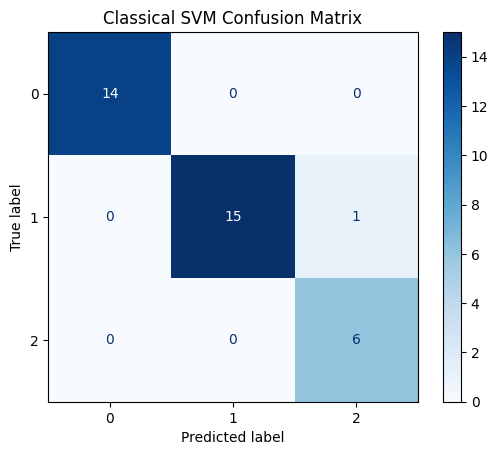

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_classical = confusion_matrix(y_test, y_pred)
disp_classical = ConfusionMatrixDisplay(confusion_matrix=cm_classical)
disp_classical.plot(cmap='Blues')
plt.title('Classical SVM Confusion Matrix')
plt.show()

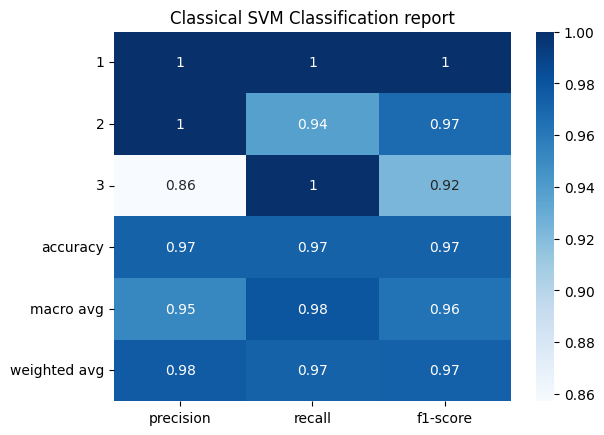

In [40]:
from sklearn.metrics import classification_report
import seaborn as sns

report_classical = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report_classical).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classical SVM Classification report')
plt.show()